<a href="https://colab.research.google.com/github/Christy22-cloud/Python_Class2025/blob/main/Copy_of_Christy_MANKOU_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Employee Performance Dataset**

The dataset under consideration captures detailed information about 1,000 employees, encompassing their demographic attributes, employment details, and performance metrics. It provides a rich collection of features, including unique identifiers, age, gender, department, salary, joining date, performance scores, years of experience, employment status, work location, and assigned work sessions. These data points offer valuable insights into the workforce dynamics and operational structure of an organization.

This dataset represents a typical business scenario in human resource management where companies aim to optimize employee performance, ensure equitable compensation, enhance retention, and achieve operational efficiency. The incomplete performance score data introduces an element of real-world complexity, highlighting challenges such as incomplete evaluations or data gaps often faced by HR teams.

Analyzing this dataset offers opportunities to address key business challenges, such as identifying factors driving high performance, understanding patterns in employee turnover, optimizing salary structures, and evaluating the influence of demographic or work-related attributes on employee outcomes. By leveraging this data, businesses can uncover actionable insights to improve employee satisfaction, retention, and overall organizational productivity.

Website :
[link text](https://www.kaggle.com/datasets/nadeemajeedch/employee-performance-and-salary-dataset?select=Employe_Performance_dataset.csv)

    #The problem to solve based on this dataset and its relevance
    

I started by importing the `pandas` library, which is essential for working with datasets in Python. Then, I loaded the file `Employe_Performance_dataset.csv` into a DataFrame called `employee_performance` using the `pd.read_csv()` function. This allowed me to convert the data from the CSV file into a structured table format. Finally, I used the `.head(10)` method to display the first 10 rows of the dataset so I could quickly preview its structure and contents.







In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Employe_Performance_dataset.csv'
import pandas as pd
employee_performance = pd.read_csv(file_path)
employee_performance.head(10)

I used the `len()` function to determine the total number of rows in the `employee_performance` DataFrame. This gave me the count of all the records in the dataset. I wanted to know the dataset's size to understand how many entries I have to work with, which is important for assessing the scope of my analysis and identifying potential issues like missing data.

In [ ]:
len(employee_performance)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

# Cleaning the dataset

In [ ]:
# I want to identify only the columns with missing values
missing_column = employee_performance.columns[employee_performance.isnull().any()]
print(missing_column)

In [ ]:
missing_data = employee_performance[missing_column]
print(missing_data)


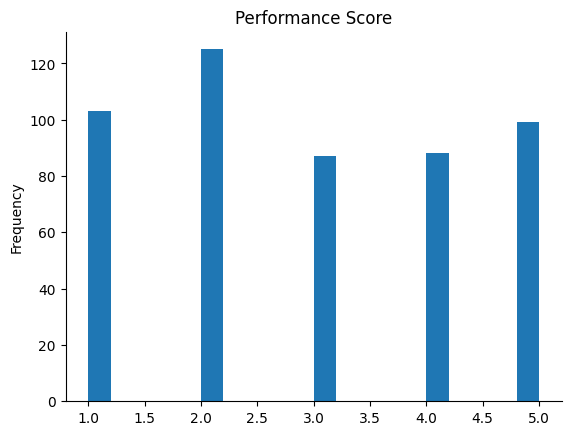

In [ ]:
# @title Performance Score

from matplotlib import pyplot as plt
employee_performance['Performance Score'].plot(kind='hist', bins=20, title='Performance Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

 We have displayed the histogram of the `Performance Score` column, to show its distribution. The histogram displays the frequency of values. From the plot, we observe that the data is not normally distributed and has some skewness. Given this, we will use the **median** to fill in the missing values, as it is more robust to skewed data and outliers. This approach ensures that the imputed values align better with the dataset's actual distribution.

In [ ]:
median_score = employee_performance['Performance Score'].median()
print(median_score)
#I want to replace all the NaN value in the Performance Scolre column by the median and I only want one number after the dot


3.0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#I want to replace all the NaN value in the Performance Scolre column by the median and I only want one number after the dot
employee_performance['Performance Score'] = employee_performance['Performance Score'].fillna(median_score).round(1)
print(employee_performance.head(10))

In [ ]:
duplicates = employee_performance.duplicated()
print(f'Number of duplicates : {len(employee_performance[duplicates])}')

In [ ]:
empty_rows = employee_performance[employee_performance.isnull().all(axis=1)]
print(f'Number of empty rows : {len(empty_rows)}')


In [ ]:
# I want to filter the column Status only display the the rows 'Retired'
retired_employees = employee_performance[employee_performance['Status'] == 'Retired']
retired_employees

In [ ]:
# Distribution of the performance score
performance_distribution = employee_performance['Performance Score'].value_counts(normalize=True) * 100
print(performance_distribution)


Performance Score
3.0    58.5
2.0    12.5
1.0    10.3
5.0     9.9
4.0     8.8
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


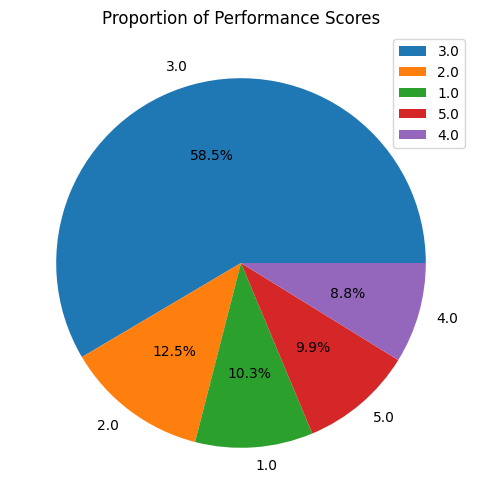

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
performance_distribution.plot(kind='pie',autopct='%1.1f%%', legend=True)
plt.title("Proportion of Performance Scores")
plt.ylabel("")
plt.show()

In [ ]:
# If the age is greater than 60, replace the status 'Inactive' by 'Retired'
employee_performance.loc[employee_performance['Age'] > 60, 'Status'] = 'Retired'
employee_performance.head(10)

**I will create a dictionnary of department insights**

Creating a dictionary of department insights is relevant because it provides a structured way to store and analyze key metrics, such as average salary and performance scores, for each department. This centralized approach simplifies comparisons across departments, helps identify areas needing improvement (low performance), and highlights successful teams as benchmarks. By organizing this data efficiently, the dictionary enables informed, data-driven decisions and supports advanced analysis or visualizations for deeper insights.

In [ ]:
# I want the average of Salary for each department
department_salary = employee_performance.groupby('Department')['Salary'].mean().round(1)
department_salary = department_salary.sort_values(ascending=False).reset_index()
print(department_salary)

  Department  Salary
0         HR  5982.4
1         IT  5968.4
2      Sales  5804.1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#I want the number of employees for each department
department_count = employee_performance.groupby('Department').size()
department_count = department_count.reset_index(name= 'Employee Count')
print(department_count)

  Department  Employee Count
0         HR             323
1         IT             339
2      Sales             338


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# I want the average performance score for each department
department_performance = employee_performance.groupby('Department')['Performance Score'].mean().round(1)
department_performance = department_performance.sort_values(ascending=False).reset_index()
print(department_performance)

  Department  Performance Score
0         IT                3.0
1         HR                2.9
2      Sales                2.9


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# I want the percentage of 'Active' for each department
department_status = employee_performance.groupby('Department')['Status'].value_counts(normalize=True) * 100.
department_status = department_status.unstack().astype(int)
department_status

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Status,Active,Inactive,Retired
Department,,,
HR,44,45,9
IT,43,46,9
Sales,42,44,12


In [ ]:
# I want to create a dictionnary that show the insights about each department
department_insights = {
    "HR": {
        "Average Salary": 5982.4,
        "Number of Employees": 323,
        "Average Performance Score": 2.9,
        "Active Percentage": '44%',
        "Inactive Percentage": '45%',
        "Retired Percentage": '9%'
    },
    "IT": {
        "Average Salary": 5968.4 ,
        "Number of Employees": 339,
        "Average Performance Score": 3.0,
        "Active Percentage": '43%',
        "Inactive Percentage": '46%',
        "Retired Percentage": '9%'
    },
    "Sales": {
        "Average Salary": 5804.1,
        "Number of Employees": 338,
        "Average Performance Score": 2.9,
        "Active Percentage": '42%',
        "Inactive Percentage": '44%',
        "Retired Percentage": '12%'
    }

}
department_insights

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
departments = list(department_insights.keys())
avg_salaries = [department_insights[d]['Average Salary'] for d in departments]
avg_performance = [department_insights[d]['Average Performance Score'] for d in departments]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


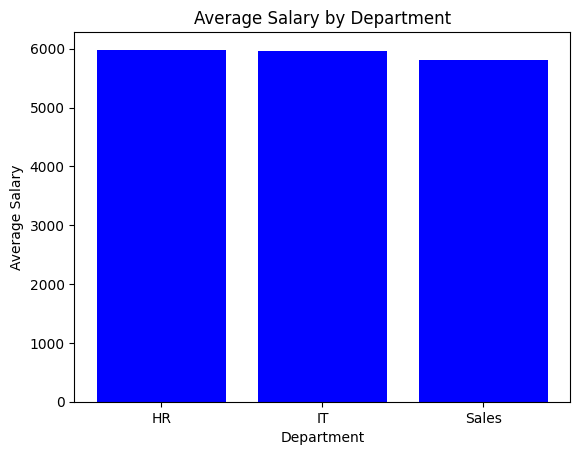

In [ ]:
# Bar chart for average salaries
plt.bar(departments, avg_salaries, color='blue')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


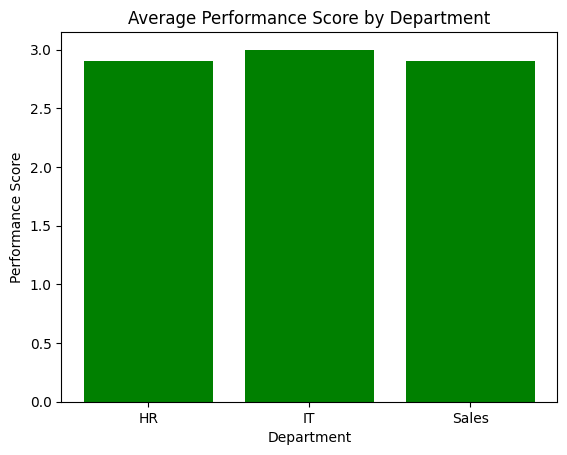

In [ ]:
# Bar chart for average performance scores
plt.bar(departments, avg_performance, color='green')
plt.title("Average Performance Score by Department")
plt.xlabel("Department")
plt.ylabel("Performance Score")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


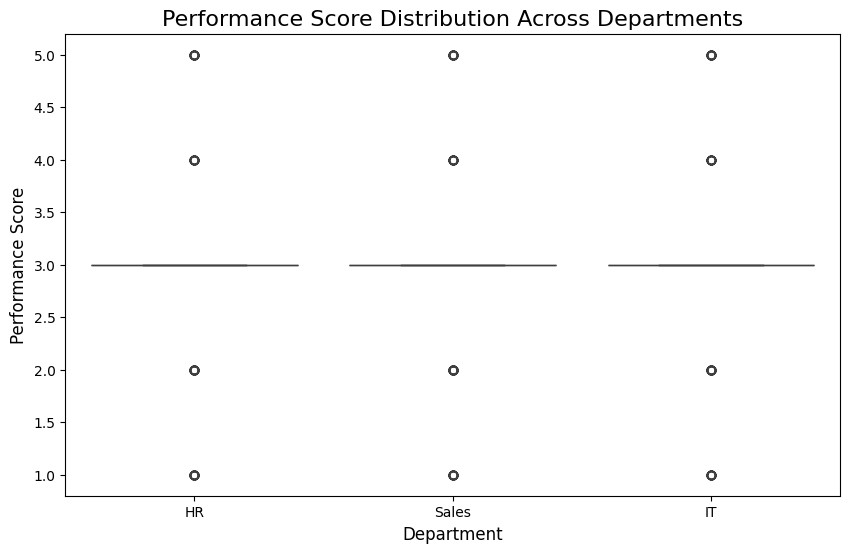

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Performance Score', data=employee_performance)

# Add titles and labels
plt.title("Performance Score Distribution Across Departments", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Performance Score", fontsize=12)
plt.xticks(rotation=0)  # Rotate department labels if necessary
plt.show()

The box plot visualization highlights the distribution of performance scores across the HR, Sales, and IT departments, with all departments exhibiting a median score close to 3.0. This indicates that most employees are performing at an average level. Outliers are present in each department, representing employees with either extremely low (1.0) or high (5.0) performance scores, which warrant further investigation—low performers may need additional support, while high performers could be standout contributors. The narrow interquartile range (IQR) in all departments shows low variability and a consistent performance trend. However, since the performance scores are similar across departments, the visualization primarily confirms uniformity rather than providing actionable insights for performance improvement. This chart is useful for identifying trends in consistency and highlighting outliers, but deeper analysis of factors like salary or experience would be needed for more actionable conclusions.

In [ ]:
# I want to filter the employees that have a salary greater than the mean using if function

mean_salary = employee_performance['Salary'].mean()

filtered_employees = []
for index, row in employee_performance.iterrows():
    if row['Salary'] > mean_salary:
        filtered_employees.append(row)

filtered_employees = pd.DataFrame(filtered_employees)
filtered_employees.head(10)

In [ ]:
len(filtered_employees)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


498

In [ ]:
# If the Performance score is less than 2, I want to print the entire row from filtered_employee
low_performers_high_salary = filtered_employees[filtered_employees['Performance Score'] < 2]
low_performers_high_salary

In [ ]:
len(low_performers_high_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


56

In [ ]:
# I want the employees that have a salary lower that the average salary
filtered_employees_low_salary = []
for index, row in employee_performance.iterrows():
    if row['Salary'] < mean_salary:
        filtered_employees_low_salary.append(row)

filtered_employees_low_salary = pd.DataFrame(filtered_employees_low_salary)
filtered_employees_low_salary.head(10)

In [ ]:
len(filtered_employees_low_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


502

In [ ]:
low_performers_low_salary = filtered_employees_low_salary[filtered_employees_low_salary['Performance Score'] < 2]
low_performers_low_salary

In [ ]:
len(low_performers_low_salary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


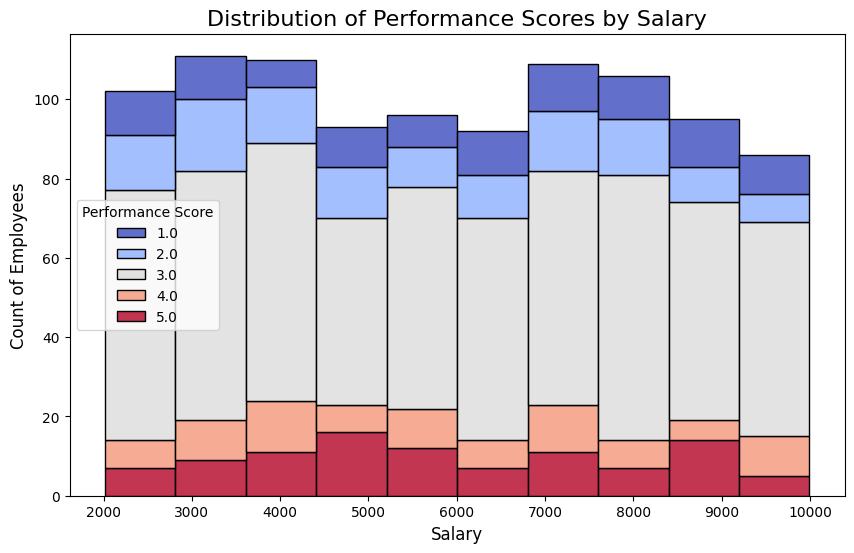

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_performance, x='Salary', hue='Performance Score', multiple='stack', bins=10, palette='coolwarm', alpha=0.8)

# Add titles and labels
plt.title("Distribution of Performance Scores by Salary", fontsize=16)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Count of Employees", fontsize=12)
plt.show()

The analysis reveals a positive correlation between salary and performance, with high-performing employees predominantly found in higher salary ranges, suggesting that increased compensation may motivate better performance or reflect higher skill levels. However, a small proportion of low-performing employees also exist in high salary groups, highlighting potential inefficiencies in salary allocation or mismatches in role expectations. Overlaps of performance scores in mid-range salary bins suggest that salary alone is not the sole determinant of performance, pointing to the importance of non-monetary factors like training and role alignment. Furthermore, the skew toward lower salary ranges raises concerns about retaining high performers in these groups, emphasizing the need for targeted compensation adjustments and performance-focused incentives. This analysis underscores the value of refining salary structures and addressing non-salary factors to enhance employee performance and retention.

In [ ]:
# Group by session and calculate mean and median performance scores
session_order = ['Morning', 'Evening', 'Night']
session_performance = employee_performance.groupby('Session')['Performance Score'].agg(['mean', 'median','count']).reindex(session_order)
session_performance

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean,median,count
Session,,,
Morning,2.914110,3.0,163
Evening,2.980392,3.0,153
Night,2.849462,3.0,186


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


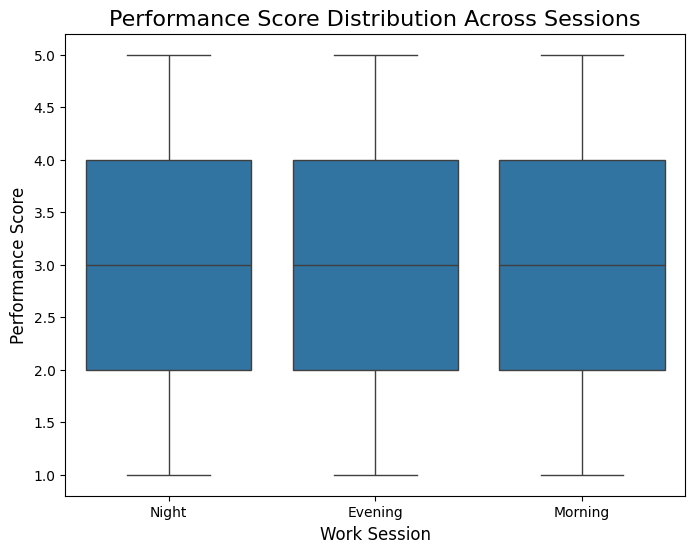

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Session', y='Performance Score', data=employee_performance)
plt.title("Performance Score Distribution Across Sessions", fontsize=16)
plt.xlabel("Work Session", fontsize=12)
plt.ylabel("Performance Score", fontsize=12)
plt.show()

Based on the descriptive statistics and the box plot visualization, we observe that the **performance scores** are fairly consistent across work sessions (Morning, Evening, Night), with all sessions showing similar median scores around 3.0. However, the box plot highlights some variability, with **Morning sessions** having slightly more outliers at the lower end of the performance scale, suggesting that some employees may struggle during this time. The **Evening and Night sessions** show more concentrated performance distributions, indicating greater consistency among employees during these shifts. These insights suggest that while overall performance is uniform, the **Morning session** may require further investigation to identify factors impacting lower performers, such as workload or individual preferences.